Data Description

The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The dataset contains the factors which are used to determine the happiness score for different countries.

Target

We need to predict the happiness score using the every factor in the dataset

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset

df=pd.read_csv('happiness_score.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

The dataset contains 158 rows and 12 columns

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

As we need to predict the Happiness score at the end so lets reindex the columns

In [5]:
df=df[['Country', 'Region', 'Happiness Rank','Standard Error', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Score']]

In [6]:
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


Here we reindex the columns and shift the desired target at the end.

In [7]:
df.describe()  #statistical summary

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


Observations Made:

1. Almost in every column the mean & median is approximately same.
2. Std has a quite dviated from the mean and median.
3. So, for finding the skewness and outliers we will plot the every column.

In [8]:
# finding null value

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

<AxesSubplot:>

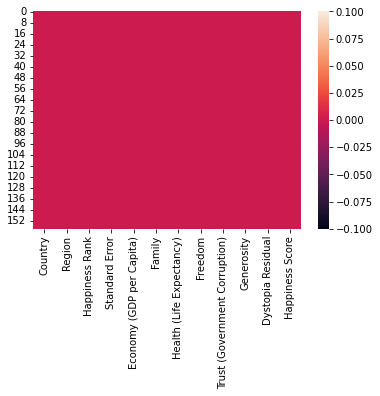

In [9]:
sns.heatmap(df.isnull())

there in no null value in the dataset.

In [10]:
df.skew()

Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

It shows that there are skewness in 4 columns: Std error, Family, Trust, Generosity.
Lets plot them to see the skewness

# Data visualisation

<AxesSubplot:xlabel='Family', ylabel='Density'>

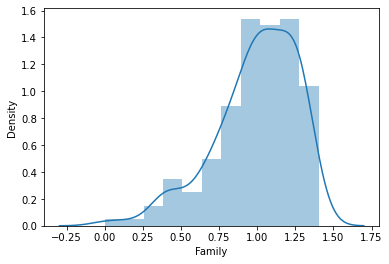

In [11]:
sns.distplot(df['Family'])

It shows that it is slightly right skewed

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

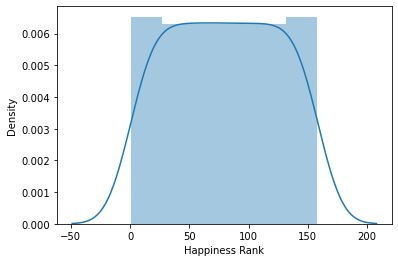

In [12]:
sns.distplot(df['Happiness Rank'])

The above plot show that the data is normalized

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

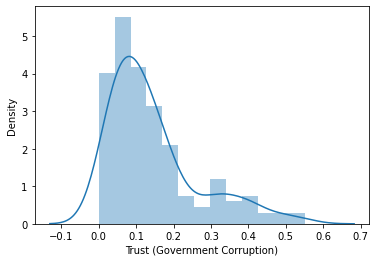

In [13]:
sns.distplot(df['Trust (Government Corruption)'])

The above plot is slightly left skewed.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

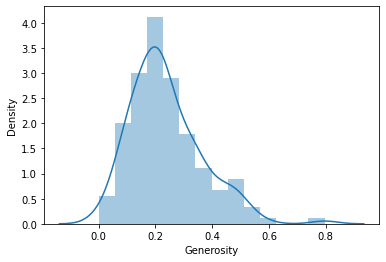

In [14]:
sns.distplot(df['Generosity'])

It show only a little bit skewness, we can considered it normalize.

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

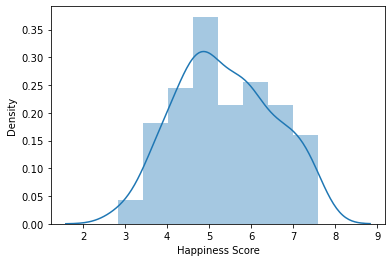

In [15]:
sns.distplot(df['Happiness Score'])

Normalized data

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

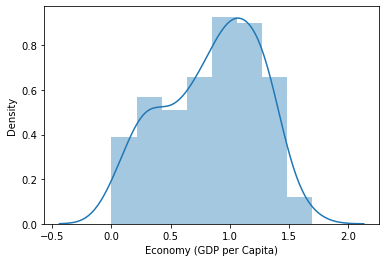

In [16]:
sns.distplot(df['Economy (GDP per Capita)'])

Almost normalized data

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

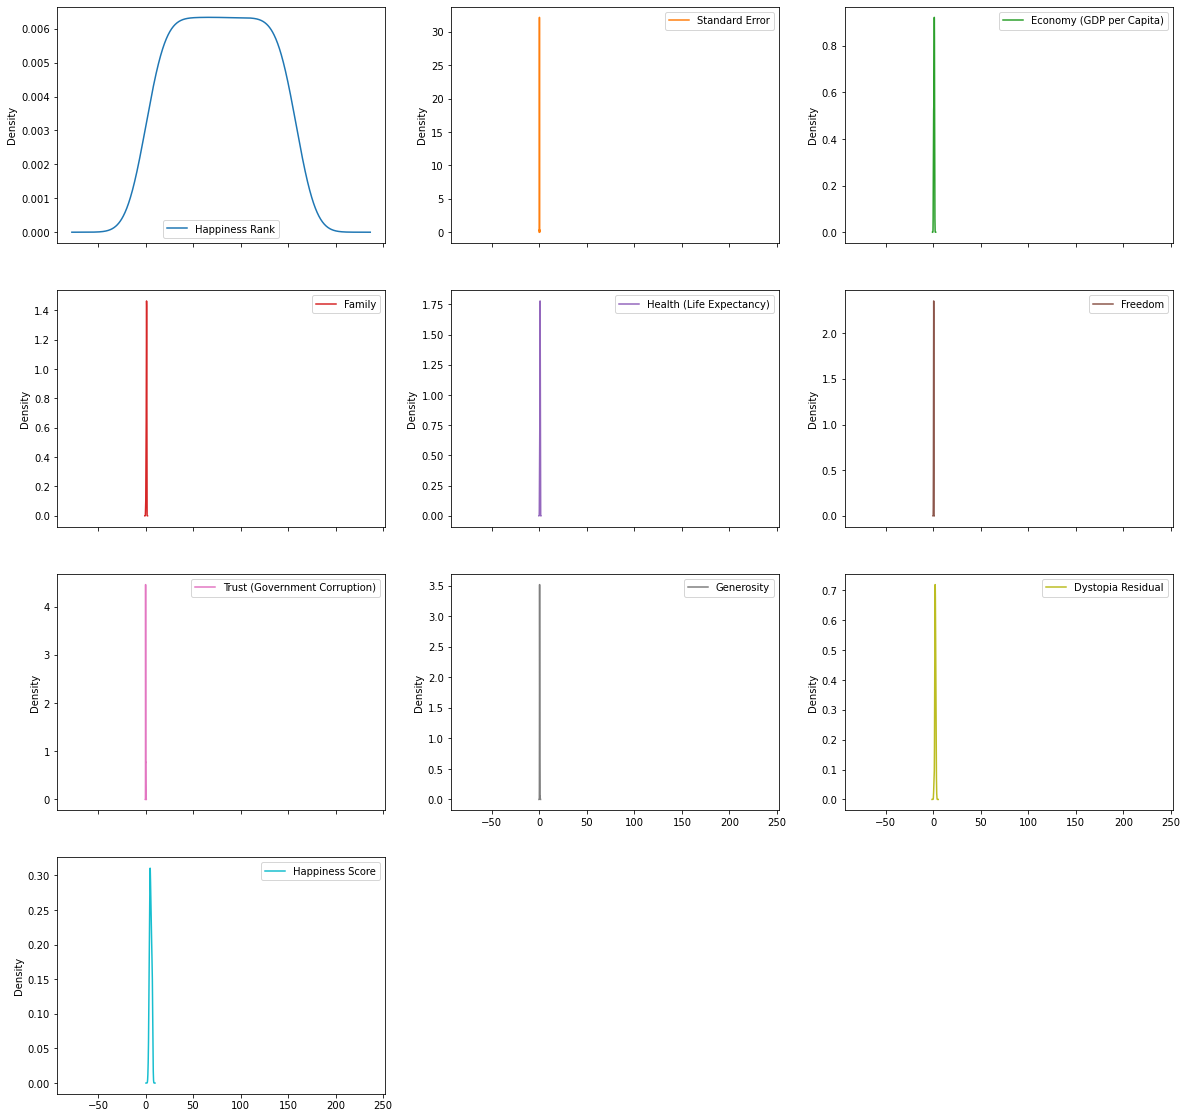

In [17]:
df.plot(kind='kde',subplots=True,layout=(4,3),figsize=(20,20))

the above subplots doesn't provide any good information

Happiness Rank                      AxesSubplot(0.125,0.772143;0.352273x0.107857)
Standard Error                   AxesSubplot(0.547727,0.772143;0.352273x0.107857)
Economy (GDP per Capita)            AxesSubplot(0.125,0.642714;0.352273x0.107857)
Family                           AxesSubplot(0.547727,0.642714;0.352273x0.107857)
Health (Life Expectancy)            AxesSubplot(0.125,0.513286;0.352273x0.107857)
Freedom                          AxesSubplot(0.547727,0.513286;0.352273x0.107857)
Trust (Government Corruption)       AxesSubplot(0.125,0.383857;0.352273x0.107857)
Generosity                       AxesSubplot(0.547727,0.383857;0.352273x0.107857)
Dystopia Residual                   AxesSubplot(0.125,0.254429;0.352273x0.107857)
Happiness Score                  AxesSubplot(0.547727,0.254429;0.352273x0.107857)
dtype: object

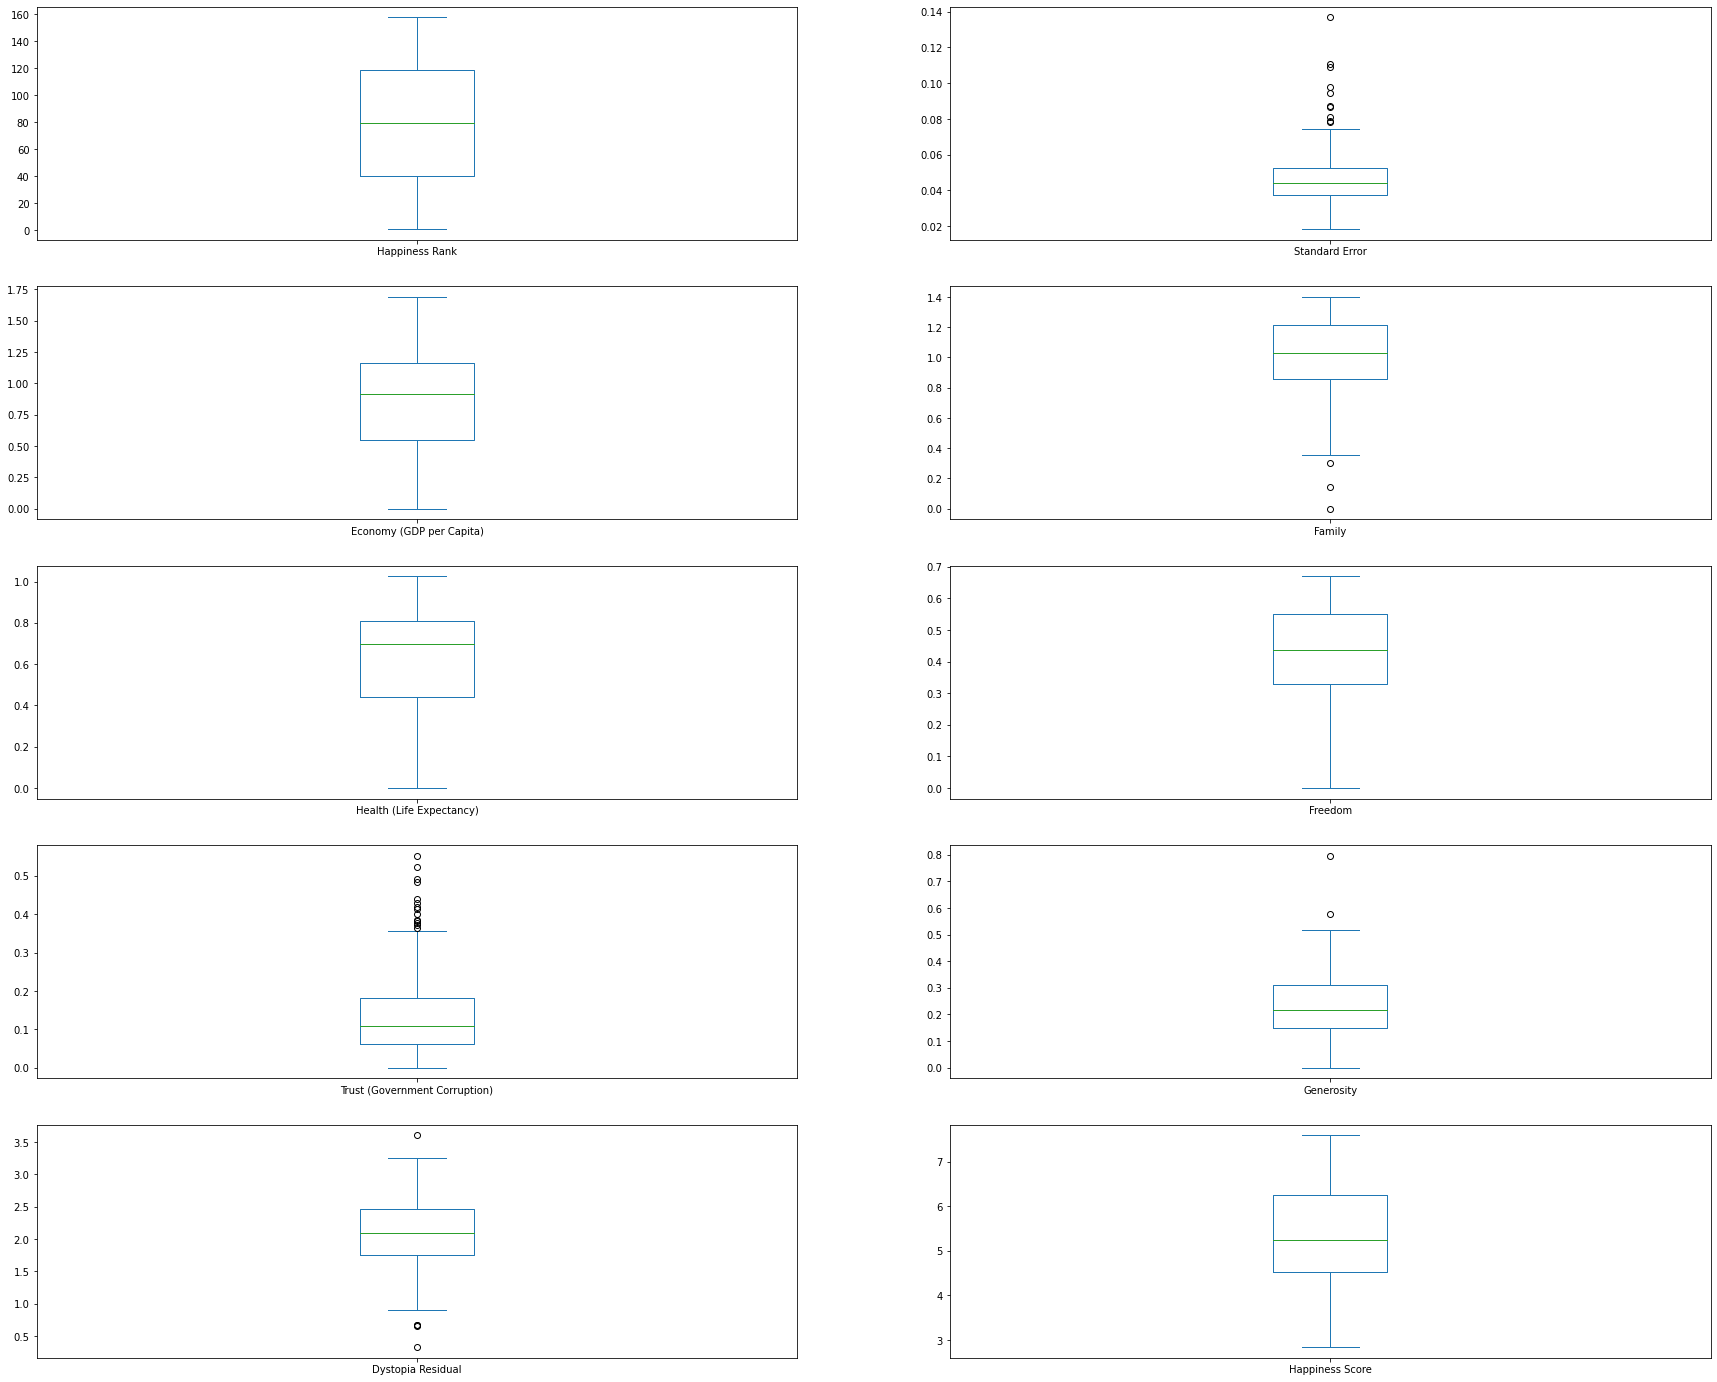

In [18]:
df.plot(kind='box',subplots=True,layout=(6,2),figsize=(30,30))

It shows that the more outliers are present in the standard error, Trust column and less outliers in family, Generosity and Dystopia Residual column.

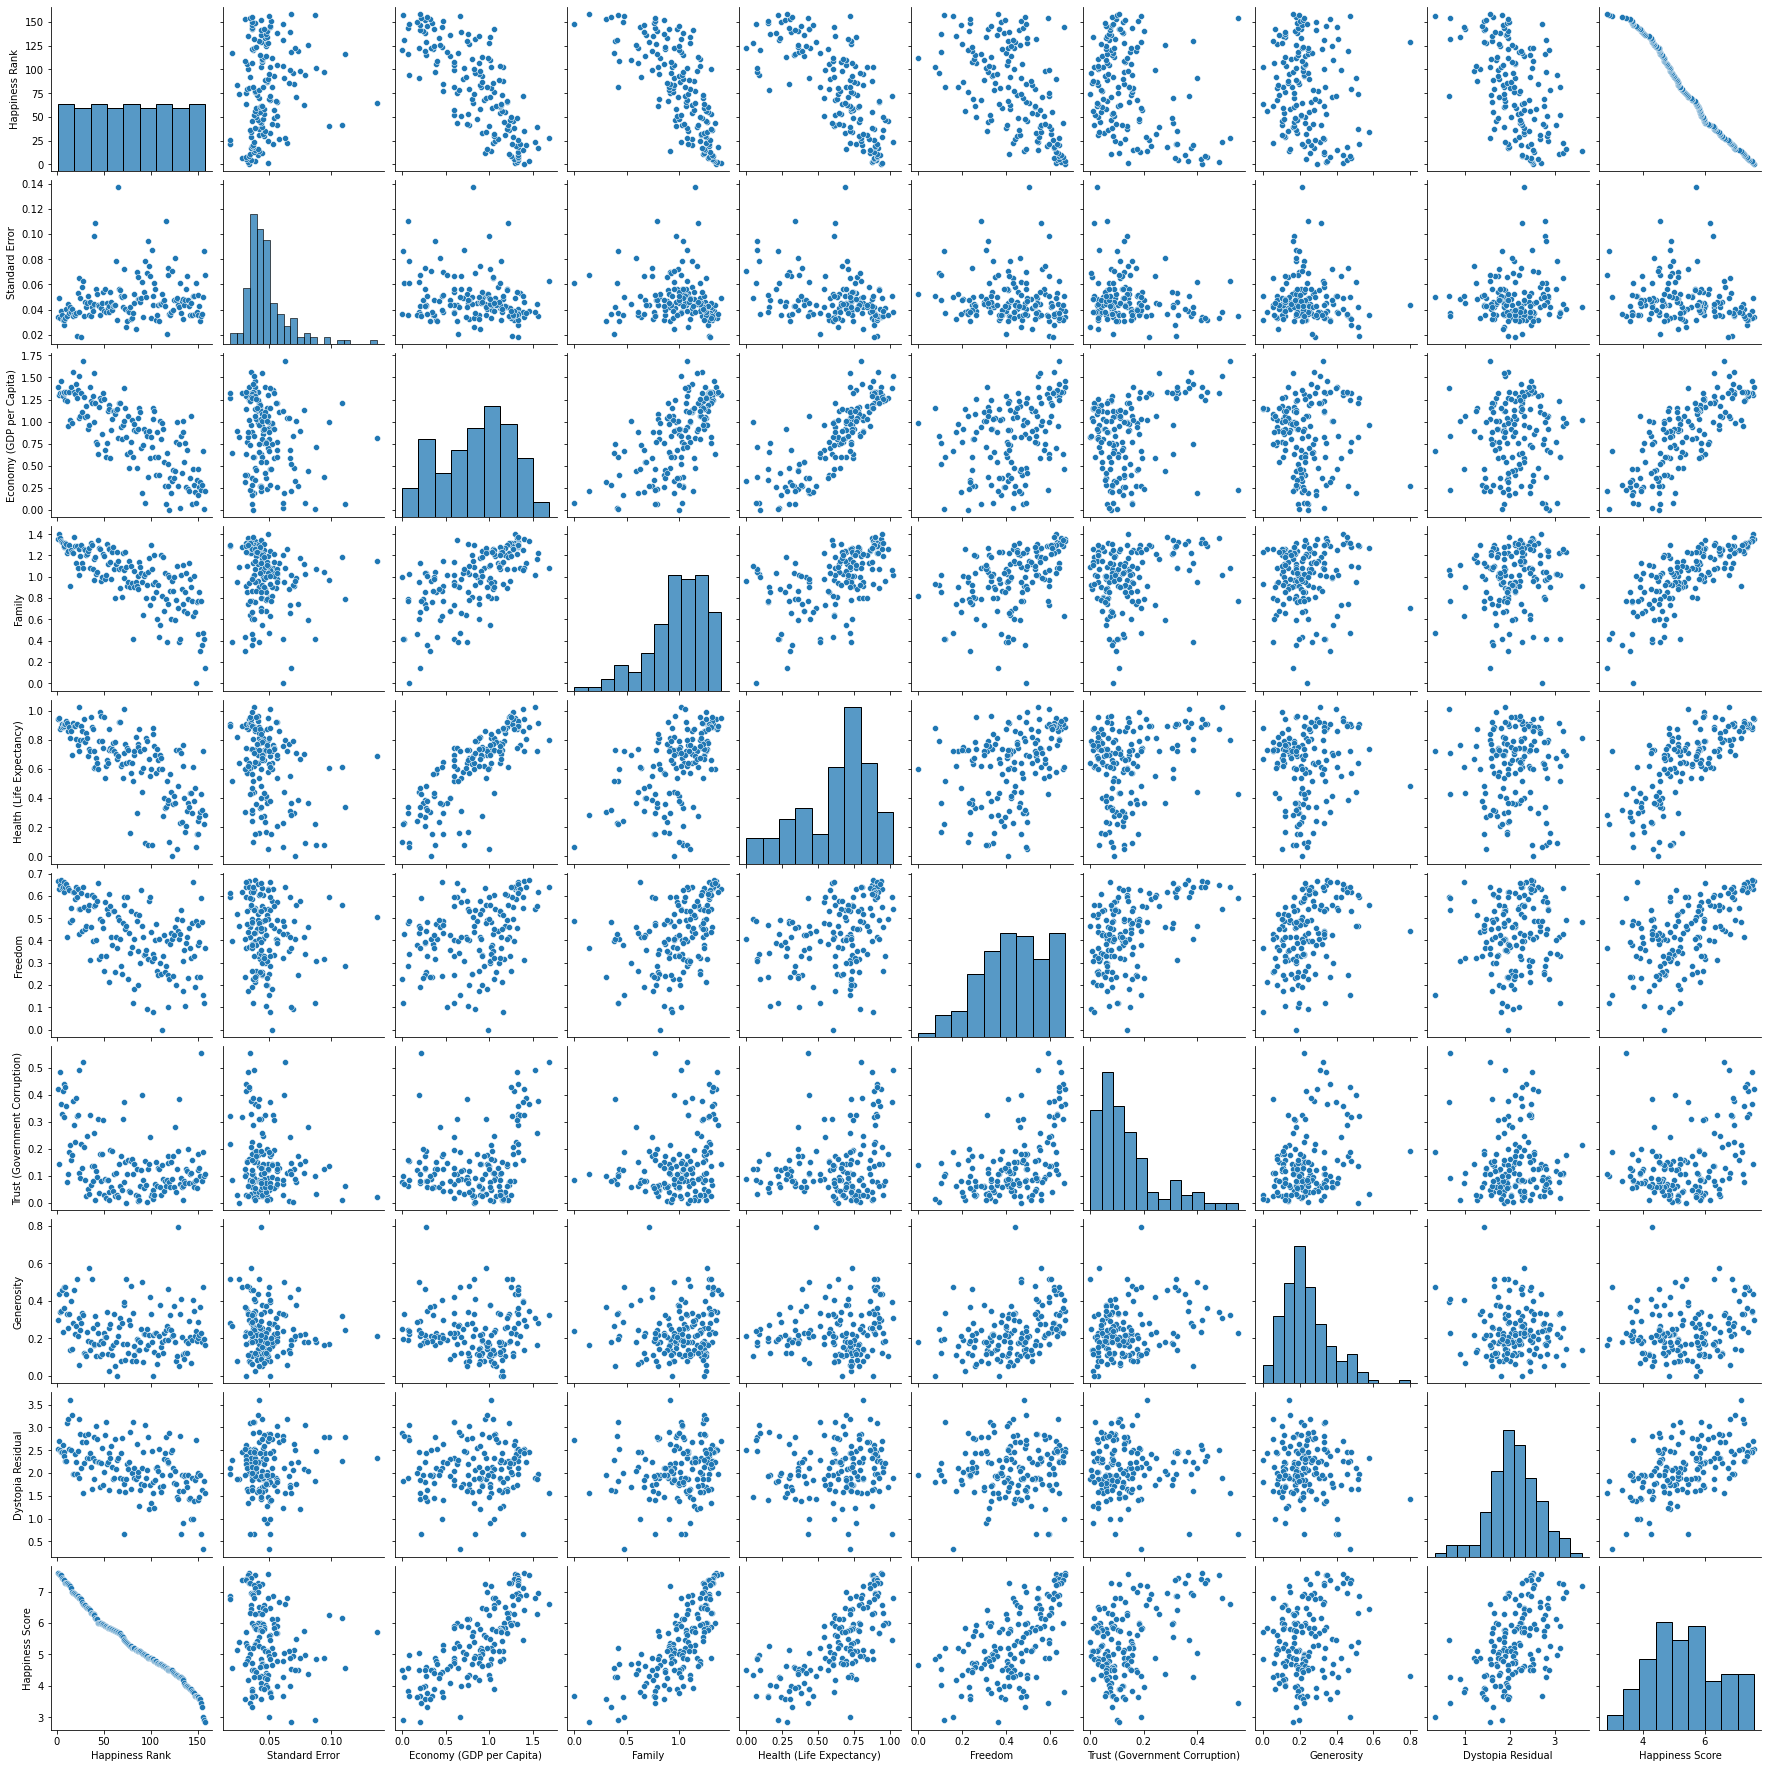

In [19]:
sns.pairplot(df)

In [20]:
# correlation between the columns

df.corr()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.992105
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


<AxesSubplot:>

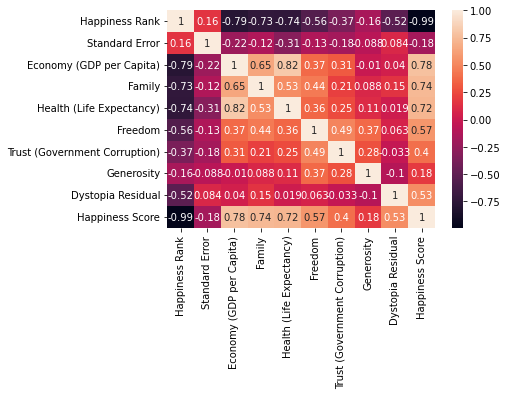

In [21]:
sns.heatmap(df.corr(),annot=True)

It shows that Happiness rank is highly negatively correlated to Happiness Score so we can drop that column and also the columns containing the string values doesn't contribute anything to calculate our target so we can also drop themn as well.

In [22]:
# dropping the columns

df.drop(['Happiness Rank','Country','Region'],axis=1,inplace=True)
df.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


Removing outliers

In [23]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,1.937360
1,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857,1.914581
2,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,1.884792
3,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,1.880411
4,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,1.797179
...,...,...,...,...,...,...,...,...,...
153,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925,1.674055
154,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967,1.783571
155,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430,2.076199
156,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985,2.164688


In [24]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([5, 0, 0, 0, 6, 2, 5, 7, 2], dtype=int64))


In [25]:
df=df_new
df.shape

(149, 9)

In [26]:
# dividing the columns for machine learning

#independent column
x=df.iloc[:,:-1]
#target value
y=df.iloc[:,-1]

In [27]:
# transforming the data

from sklearn.preprocessing import power_transform
x=power_transform(x)
x

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [28]:
# scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

Since the outcome has different values we will use Linear Regression and other forms of regression to find the best model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [31]:
# train the model at different random states and getting the accuracy score for each rangom state for every machine learning model

model=[lg,rdr,svr,dtr,knr]
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    for j in model:
        j.fit(x_train,y_train)
        pred_train=j.predict(x_train)
        pred_test=j.predict(x_test)
        print('Accuracy score at ',i , 'random state',j,':',j.score(x_train,y_train)*100)
        print('\n')

Accuracy score at  40 random state LinearRegression() : 99.4046026873666


Accuracy score at  40 random state RandomForestRegressor() : 98.77324994859428


Accuracy score at  40 random state SVR() : 98.43038006172999


Accuracy score at  40 random state DecisionTreeRegressor() : 100.0


Accuracy score at  40 random state KNeighborsRegressor() : 93.43573573078007


Accuracy score at  41 random state LinearRegression() : 99.51921678136677


Accuracy score at  41 random state RandomForestRegressor() : 98.62093695411377


Accuracy score at  41 random state SVR() : 98.58151697319566


Accuracy score at  41 random state DecisionTreeRegressor() : 100.0


Accuracy score at  41 random state KNeighborsRegressor() : 93.07688117198877


Accuracy score at  42 random state LinearRegression() : 99.33355590443901


Accuracy score at  42 random state RandomForestRegressor() : 98.3533870157484


Accuracy score at  42 random state SVR() : 98.56881861698098


Accuracy score at  42 random state DecisionTre

In [32]:
#calculating the cross val score for each model at different cv

from sklearn.model_selection import cross_val_score
for i in range(2,7):
    for j in model:
        cr=cross_val_score(j,x,y,cv=i)
        cr_mean=cr.mean()
        print("at cv= ", i)
        print('cross val score = ',cr_mean*100)
        print('accuracy score of',j ,' = ',j.score(x_train,y_train)*100)
        print('\n')

at cv=  2
cross val score =  84.96218971408204
accuracy score of LinearRegression()  =  99.45070851732066


at cv=  2
cross val score =  -432.1034079681278
accuracy score of RandomForestRegressor()  =  98.13304632813413


at cv=  2
cross val score =  -440.54532679879605
accuracy score of SVR()  =  98.38144037799327


at cv=  2
cross val score =  -423.67473326773325
accuracy score of DecisionTreeRegressor()  =  100.0


at cv=  2
cross val score =  -432.483097482309
accuracy score of KNeighborsRegressor()  =  92.60639929591316


at cv=  3
cross val score =  88.48139146971015
accuracy score of LinearRegression()  =  99.45070851732066


at cv=  3
cross val score =  -284.05143967962675
accuracy score of RandomForestRegressor()  =  98.13304632813413


at cv=  3
cross val score =  -302.17110410974965
accuracy score of SVR()  =  98.38144037799327


at cv=  3
cross val score =  -349.21941525205824
accuracy score of DecisionTreeRegressor()  =  100.0


at cv=  3
cross val score =  -330.4421968032

In [33]:
#calculating the r2 score for each model

from sklearn.metrics import r2_score
for i in model:
    print(i)
    print(r2_score(y_test,pred_test))
    print('\n')

LinearRegression()
0.8710909116406275


RandomForestRegressor()
0.8710909116406275


SVR()
0.8710909116406275


DecisionTreeRegressor()
0.8710909116406275


KNeighborsRegressor()
0.8710909116406275




In [34]:
# calculating the errors in different models

for i in model:
    print(i)
    print('mean absolut error: ',mean_absolute_error(y_test,pred_test))
    print('mean squared error: ',mean_squared_error(y_test,pred_test))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_test)))
    print('\n')

LinearRegression()
mean absolut error:  0.32363555555555557
mean squared error:  0.17519568000000002
root mean squared error:  0.418563830257704


RandomForestRegressor()
mean absolut error:  0.32363555555555557
mean squared error:  0.17519568000000002
root mean squared error:  0.418563830257704


SVR()
mean absolut error:  0.32363555555555557
mean squared error:  0.17519568000000002
root mean squared error:  0.418563830257704


DecisionTreeRegressor()
mean absolut error:  0.32363555555555557
mean squared error:  0.17519568000000002
root mean squared error:  0.418563830257704


KNeighborsRegressor()
mean absolut error:  0.32363555555555557
mean squared error:  0.17519568000000002
root mean squared error:  0.418563830257704




From above all the predictions and calculations done we can conclude that the linear regression model is best model to predict the happiness score and can be saved as the best model

Observations made for Linear regression model:
1. At random state 48 we are getting the best accuracy of 99.576
2. The cross val score is 88.481 at cv=3
3. The r2 score is 0.87109
4. The mean absolut error:  0.3236, mean squared error:  0.1751, root mean squared error:  0.4185


# Model Saving

In [35]:
import pickle
filename='Happiness_Score.pkl'
pickle.dump(lg, open(filename,'wb'))

# Conclusion

In [36]:
import numpy as np
a=np.array(y_test)
pred=np.array(lg.predict(x_test))
hscore=pd.DataFrame({'Actual':a,'Predicted':pred})
hscore

,Actual,Predicted
0,6.575,6.705178
1,5.140,5.110040
2,4.839,4.872432
3,4.297,4.295198
4,5.129,5.101666
5,4.252,4.267714
6,3.904,3.892097
7,5.987,6.160929
8,3.587,3.642811
9,5.073,5.027985
